# Checkerboard Task - Regression
In this exercise we will solve the checkerboard task using a regression approach.

## Introduction
The the data consists of 2D vectors (x1, x2) uniformly sampled in the range (-1, 1).
The data samples are classified by the XOR (exclusive or) operation.

The task is to train a simple neural network to correctly classify the data.
For now we formulate this problem as regression task with the network predicting a single value y_model and the optimizer minimizing the mean squared error between model and data.

## Imports and Seeding
First we will do the necessary imports:
* `numpy` for general data handling and array manipulation
* `tensorflow` to build and train the regression model
* `matplotlib.pyplot` for plotting

In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

Then we set a random seed for the `np.random` module. This makes our code reproducible as the random operations will yield the same results in every run through the notebook.

In [2]:
np.random.seed(42)

## Data creation
The the data consists of 2D vectors $(x_1, x_2)$ uniformly sampled in the range $(-1, 1)$.

The data samples are classified as signal $y = 1$ if either $x_1>0$ or $x_2>0$ (but not both).

* x = $(x_1, x_2)$ with random numbers $x_1, x_2$ ~ Uniform(-1, 1)
* y = XOR$(x_1, x_2)$

In [3]:
N = 1000
xdata = np.random.uniform(low=-1, high=1, size=(N, 2)) # shape = (N, 2)
ydata = (xdata[:, :1] * xdata[:, 1:]) < 0  # shape = (N, 1)

## Model Creation
We build a simple neural netowork.

**TODO**: Inspect the implemented model. What is the total number of parameters? Do the calculation by pen&paper.


In [4]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(4, activation="relu", input_dim=2),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

2022-08-05 16:29:12.204297: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


**TODO**: Now verify your pen&paper result using the `model.summary` function.

In [5]:
"""
TODO: Extract the number of parameters of your model.
"""
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


Define objective, optimizer and prepare TF computation graph:
* objective: mean squared error
* optimizer: (stochastic) gradient descent
* metrics: accuracy

In [6]:
learning_rate = 5e-2
sgd = tf.keras.optimizers.SGD(learning_rate)
model.compile(
    loss="mse",  
    optimizer=sgd,  
    metrics=["accuracy"],
)

## Model Training
Now train the model to an accuracy of at least 90%. How many epochs are needed to this?

**Hint:** The `verbose` argument sets the verbosity of shell output `(0: none, 1: high, 2: low)`.

In [11]:
"""
TODO: How many epochs of training are needed to achieve an accuracy of 90%?
"""
n_epochs = 100
fit = model.fit(
    xdata,
    ydata,
    epochs=n_epochs,
    verbose=0,
)

## Model Evaluation
Now we want to visualize the predicitons of our model and the training data in the two dimensions ($x_1$ and $x_2$).

Matplotlib has many great functions to visualize data. A function which can be used to visualize data in two dimensions is `imshow` ([Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)). 

In [12]:
"""
TODO: Evaluate the output of your model output depending on the two dimensions ($x_1$ and $x_2$).
Visualize the output of your model along with the training data.
"""
n = 500
s = np.linspace(-1, 1, n)
x, y = np.meshgrid(s, s, indexing="ij")
xy = np.concatenate((x[..., None], y[..., None]), axis=-1)

In [13]:
xy = xy.reshape(-1, 2)
pred = model.predict(xy)
pred = pred.reshape(n, n, 1)

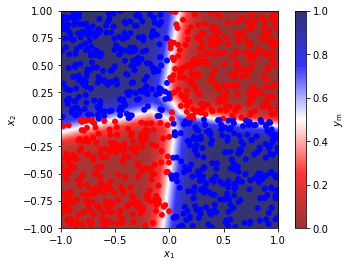

In [14]:
# plot model prediction
fig, ax = plt.subplots(1)
im = ax.imshow(
    pred,
    extent=(-1, 1, -1, 1),
    origin="lower",
    vmin=0,
    vmax=1,
    cmap=plt.cm.seismic_r,
    alpha=0.8,
)
cbar = plt.colorbar(im)
cbar.set_label("$y_\mathrm{m}$")

# plot data
colors = ["blue" if y else "red" for y in ydata]  # 'blue' for y=1 and 'red' for y=0
ax.scatter(*xdata.T, c=colors, lw=0)

ax.set(xlabel="$x_1$", ylabel="$x_2$", aspect="equal")

## Further Tasks
Change the network according to the following configurations and retrain the model.
- 8 neurons in the hidden layer
- 2 neurons in the hidden layer
- Add an additional hidden layer of 4 neurons with a ReLU activation

Describe your observations.

## Summary
This concludes our tutorial on solving the checkerboard task using a regression

In this tutorial you have learned:
* How to build a non-linear tf.keras model
* How to calculate the number of parameters of a neural network
* How to train a tf.keras model on a given data distribution
* How to visualize two dimensional data distributions